# Análise Exploratória

In [437]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_housing = pd.read_csv('housing.csv')

In [438]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [439]:
print('Número de Colunas: ', df_housing.shape[1])
print('Número de Linhas: ', df_housing.shape[0])

Número de Colunas:  10
Número de Linhas:  20640


In [440]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [441]:
def mostrar_nulls(dataset):
    for row in dataset:
        print(f'{row}: ', dataset[row].isnull().sum())

In [442]:
mostrar_nulls(df_housing)

longitude:  0
latitude:  0
housing_median_age:  0
total_rooms:  0
total_bedrooms:  207
population:  0
households:  0
median_income:  0
median_house_value:  0
ocean_proximity:  0


# Tratamento de Valores Nulos

In [443]:
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder()
df_housing['ocean_proximity'] = label_encoder.fit_transform(df_housing['ocean_proximity'])

In [444]:
nulls = df_housing.loc[(df_housing['total_bedrooms'].isna() == True)]
nulls

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,3
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,3
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,3
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,3
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,3
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,4
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,4
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,0
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,0


In [ ]:
from sklearn.impute import KNNImputer 

impute_knn = KNNImputer(n_neighbors=6) #Rever Número de Vizinhos 
array_inputed = impute_knn.fit_transform(df_housing)

df_housing = pd.DataFrame(array_inputed, columns=df_housing.columns)    

In [446]:
nulls = df_housing.loc[(df_housing['total_bedrooms'].isna() == True)]
nulls

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [447]:
print(df_housing.iloc[290])

longitude               -122.160000
latitude                  37.770000
housing_median_age        47.000000
total_rooms             1256.000000
total_bedrooms           253.333333
population               570.000000
households               218.000000
median_income              4.375000
median_house_value    161900.000000
ocean_proximity            3.000000
Name: 290, dtype: float64


In [448]:
print(mostrar_nulls(df_housing))

longitude:  0
latitude:  0
housing_median_age:  0
total_rooms:  0
total_bedrooms:  0
population:  0
households:  0
median_income:  0
median_house_value:  0
ocean_proximity:  0
None


In [449]:
df_housing.to_csv('sem_nulos.csv')
#Testado no arquivo data_treatment_null_test.py. Passou no teste.

# Relação entre variáveis dependentes e independentes

Removendo o primeiro e o último quartil, garantindo que não hajam outliers.

In [450]:
Q1 = df_housing.quantile(0.25)
Q3 = df_housing.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_housing[~((df_housing < (Q1 - 1.5 * IQR)) | (df_housing > (Q3 + 1.5 * IQR))).any(axis=1)]


In [451]:
def get_relacoes(dataset, modelo):
    return dataset.corr(modelo)

In [452]:
relacoes = get_relacoes(df_no_outliers, 'pearson')

<Axes: >

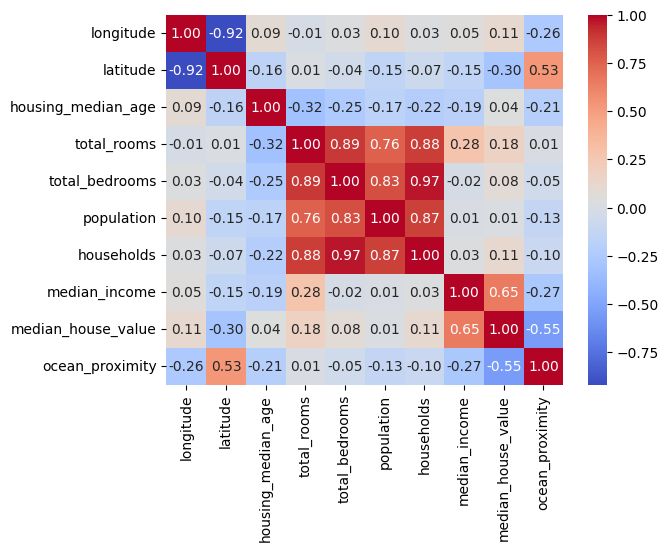

In [453]:
sns.heatmap(relacoes, annot=True, cmap='coolwarm', fmt='.2f')

# Modelos de regressão linear

## Usando Regressão Linear para prever o valor das casas

In [454]:
y = df_no_outliers['median_house_value']
x = df_no_outliers[['median_income', 'ocean_proximity', 'latitude', 'total_rooms', 'households', 'longitude', 'housing_median_age']]

In [455]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [456]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [457]:
model.coef_

array([ 3.47033762e+04, -4.62852233e+04, -1.45236130e+04, -6.18891821e+00,
        6.07750169e+01, -1.55473208e+04,  5.18300305e+02])

In [458]:
y_pred = model.predict(X_test)

In [459]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Erro de Média Absoluta: ', mean_absolute_error(y_test, y_pred))
print('Erro de Média Quadrada: ', mean_squared_error(y_test, y_pred))
print('Nota R2: ', r2_score(y_test, y_pred))

Erro de Média Absoluta:  41408.09612272056
Erro de Média Quadrada:  3220548183.1856256
Nota R2:  0.6025081799973877


In [460]:
model.score(X_train, y_train)

0.5818854186006099

In [461]:
model.score(X_test, y_test)

0.6025081799973877